<p><a name="basic"></a></p>
## What Packages do I have Installed

In [1]:
import pip

In [2]:
!pip freeze

alabaster==0.7.10
anaconda-client==1.6.9
anaconda-navigator==1.7.0
anaconda-project==0.8.2
asn1crypto==0.24.0
astroid==1.6.1
astropy==2.0.3
attrs==17.4.0
Babel==2.5.3
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.0
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==2.1.2
blpapi==3.9.1
bokeh==0.12.13
boto==2.48.0
Bottleneck==1.2.1
bqplot==0.11.6
certifi==2018.1.18
cffi==1.11.4
chardet==3.0.4
click==6.7
cloudpickle==0.5.2
clyent==1.2.2
colorama==0.3.9
comtypes==1.1.4
conda==4.4.10
conda-build==3.4.1
conda-verify==2.0.0
contextlib2==0.5.5
cryptography==2.1.4
cycler==0.10.0
Cython==0.27.3
cytoolz==0.9.0
dask==0.16.1
datashape==0.5.4
decorator==4.2.1
distributed==1.20.2
docutils==0.14
entrypoints==0.2.3
et-xmlfile==1.0.1
fastcache==1.0.2
filelock==2.0.13
Flask==0.12.2
Flask-Cors==3.0.3
gevent==1.2.2
glob2==0.6
greenlet==0.4.12
h5py==2.7.1
heapdict==1.0.0
html5lib==1.0.1
idna==2.6
imageio==2.2.0
imagesize==0.7.1
ipython==6.2.1
ipython-genutils==0.2.0
ipywidgets==7.1.1
isort=

You are using pip version 9.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


<p><a name="explore"></a></p>
## Bloomberg Interop via python wrapper
#### Accessing Bloomberg Desktop API directly

INSTRUCTIONS FOR INSTALLING THE LIBRARY
1. https://www.bloomberg.com/professional/support/api-library/
- download the Python Supported Release

2. go to command line and run: pip install pdblp

In [3]:
import pandas as pd
import pdblp #pandas wrapper to Bloomberg API. also xbbg & pybbg are popular

In [4]:
con = pdblp.BCon(debug=True, port=8194)
con.start()

pdblp.pdblp:INFO:Event Type: 'SESSION_STATUS'
pdblp.pdblp:INFO:Message Received:
SessionConnectionUp = {
    server = "localhost:8194"
    encryptionStatus = "Clear"
    compressionStatus = "Uncompressed"
}

pdblp.pdblp:INFO:Event Type: 'SESSION_STATUS'
pdblp.pdblp:INFO:Message Received:
SessionStarted = {
    initialEndpoints[] = {
        initialEndpoints = {
            address = "localhost:8194"
        }
    }
}

pdblp.pdblp:INFO:Event Type: 'SERVICE_STATUS'
pdblp.pdblp:INFO:Message Received:
ServiceOpened = {
    serviceName = "//blp/refdata"
}

pdblp.pdblp:INFO:Event Type: 'SERVICE_STATUS'
pdblp.pdblp:INFO:Message Received:
ServiceOpened = {
    serviceName = "//blp/exrsvc"
}



In [5]:
con.debug = False  #turn off 'verbose' mode

In [14]:
#historical data via 'bdh'
tickers = ['QCOM US Equity', 'AAPL US Equity', 'XIU CN Equity']
fields = ['PX_LAST', 'DX_SAF', 'VL158']  #borrow cost p/a and 3mo IVOL
start = '20200105'
end = '20200805'

In [15]:
response = con.bdh(tickers, fields, start, end)

In [16]:
type(response)

pandas.core.frame.DataFrame

In [17]:
response.tail()

ticker     QCOM US Equity                  AAPL US Equity                    \
field             PX_LAST  DX_SAF    VL158        PX_LAST   DX_SAF    VL158   
date                                                                          
2020-07-30         107.19  24.974  37.0650         96.190  112.592  31.4088   
2020-07-31         105.61  25.143  36.6846        106.260  110.736  30.8887   
2020-08-03         109.59  23.884  38.1381        108.938  114.368  34.3100   
2020-08-04         110.95  23.205  37.6730        109.665  104.396  33.8754   
2020-08-05         111.39  24.396  37.2934        110.063  108.932  32.9420   

ticker     XIU CN Equity                  
field            PX_LAST DX_SAF    VL158  
date                                      
2020-07-30       24.7280   75.0  29.6814  
2020-07-31       24.5200   75.0  21.3565  
2020-08-03           NaN   75.0      NaN  
2020-08-04       24.7900   75.0  20.8693  
2020-08-05       24.9977   75.0  19.4612

#### Chart Prices (same axis)

In [18]:
%matplotlib inline

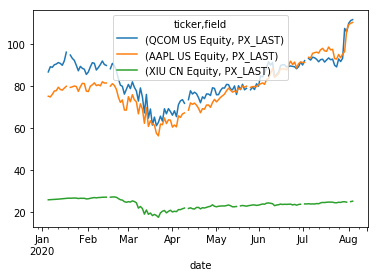

In [19]:
response.filter(like="PX_LAST").plot()

In [13]:
list(response.columns) #format for columns

[('QCOM US Equity', 'PX_LAST'),
 ('QCOM US Equity', 'DX_SAF'),
 ('QCOM US Equity', 'VL158'),
 ('AAPL US Equity', 'PX_LAST'),
 ('AAPL US Equity', 'DX_SAF'),
 ('AAPL US Equity', 'VL158'),
 ('XIU CN Equity', 'PX_LAST'),
 ('XIU CN Equity', 'DX_SAF'),
 ('XIU CN Equity', 'VL158')]

### extract one Series (column) from DataFrame

In [27]:
spycloses = response[('XIU CN Equity', 'PX_LAST')]  
spycloses.tail()

date
2020-07-30    24.7280
2020-07-31    24.5200
2020-08-03        NaN
2020-08-04    24.7900
2020-08-05    24.9977
Name: (XIU CN Equity, PX_LAST), dtype: float64

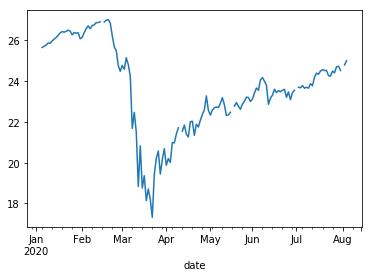

In [28]:
%matplotlib inline
spycloses.plot()   #chart it

In [29]:
type(spycloses)  #confirm dtype

pandas.core.series.Series

In [30]:
spx_df = pd.DataFrame(spycloses) #confirm to dataframe with dates as index

In [31]:
spx_df.tail()

,XIU CN Equity
,PX_LAST
date,
2020-07-30,24.7280
2020-07-31,24.5200
2020-08-03,NaN
2020-08-04,24.7900
2020-08-05,24.9977


# Non-Equity Examples

In [32]:
# individual datapoint using 'ref' (similar to 'bdp')
response2 = con.ref(['AUDUSD Curncy'], 'SETTLE_DT')
print(response2)

          ticker      field       value
0  AUDUSD Curncy  SETTLE_DT  2021-01-27


In [33]:
response3 = con.ref(['NDX Index'], 'VL137')
print(response3)

      ticker  field    value
0  NDX Index  VL137  22.7313


In [34]:
response3.value[0]

22.7313

In [35]:
response = con.bsrch("FI:ytd_green")

In [36]:
response

,0
0,BK814876 Corp
1,BM910716 Corp
2,ZO309983 Corp
3,BK398989 Corp
4,BK883764 Corp
5,BM404455 Corp
6,BK499158 Corp
7,BM664134 Corp
8,BG345649 Corp
9,BM722615 Corp
